In [ ]:
pip install xgboost

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import *
import seaborn as sns
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv("calories.csv")
vals = df["Calories"].tolist()
data = pd.read_csv("exercise.csv")
data.insert(0, 'Calories', vals) 
print(data.columns.values)

['Calories' 'User_ID' 'Gender' 'Age' 'Height' 'Weight' 'Duration'
 'Heart_Rate' 'Body_Temp']


In [ ]:
print(data.head())

   Calories   User_ID  Gender  Age  ...  Weight  Duration  Heart_Rate  Body_Temp
0     231.0  14733363    male   68  ...    94.0      29.0       105.0       40.8
1      66.0  14861698  female   20  ...    60.0      14.0        94.0       40.3
2      26.0  11179863    male   69  ...    79.0       5.0        88.0       38.7
3      71.0  16180408  female   34  ...    71.0      13.0       100.0       40.5
4      35.0  17771927  female   27  ...    58.0      10.0        81.0       39.8

[5 rows x 9 columns]


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Calories    15000 non-null  float64
 1   User_ID     15000 non-null  int64  
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Gender']= label_encoder.fit_transform(data['Gender'])
print(data.head())

   Calories   User_ID  Gender  Age  ...  Weight  Duration  Heart_Rate  Body_Temp
0     231.0  14733363       1   68  ...    94.0      29.0       105.0       40.8
1      66.0  14861698       0   20  ...    60.0      14.0        94.0       40.3
2      26.0  11179863       1   69  ...    79.0       5.0        88.0       38.7
3      71.0  16180408       0   34  ...    71.0      13.0       100.0       40.5
4      35.0  17771927       0   27  ...    58.0      10.0        81.0       39.8

[5 rows x 9 columns]


In [ ]:
data.describe()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


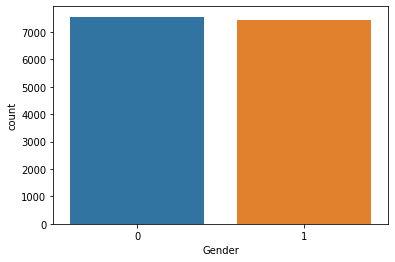

In [ ]:
sns.countplot(data["Gender"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


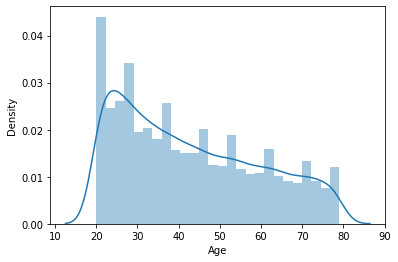

In [ ]:
sns.distplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


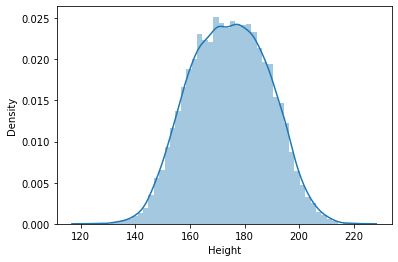

In [ ]:
sns.distplot(data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


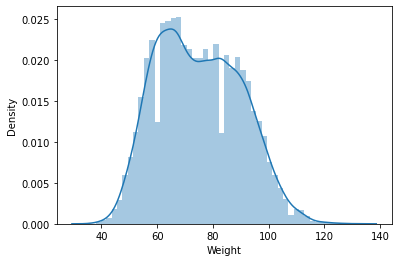

In [ ]:
sns.distplot(data['Weight'])

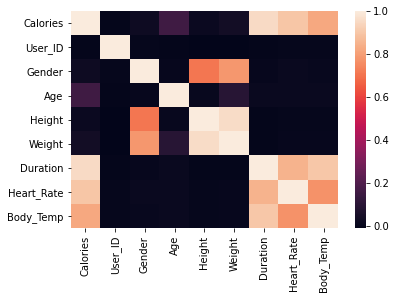

In [ ]:
sns.heatmap(data.corr())

In [ ]:
x=data[list(data.columns.values)]
y=data.loc[:,'Calories']
print(x)
print(y)

       Calories   User_ID  Gender  Age  ...  Weight  Duration  Heart_Rate  Body_Temp
0         231.0  14733363       1   68  ...    94.0      29.0       105.0       40.8
1          66.0  14861698       0   20  ...    60.0      14.0        94.0       40.3
2          26.0  11179863       1   69  ...    79.0       5.0        88.0       38.7
3          71.0  16180408       0   34  ...    71.0      13.0       100.0       40.5
4          35.0  17771927       0   27  ...    58.0      10.0        81.0       39.8
...         ...       ...     ...  ...  ...     ...       ...         ...        ...
14995      45.0  15644082       0   20  ...    86.0      11.0        92.0       40.4
14996      23.0  17212577       0   27  ...    65.0       6.0        85.0       39.2
14997      75.0  17271188       0   43  ...    58.0      16.0        90.0       40.1
14998      11.0  18643037       1   78  ...    97.0       2.0        84.0       38.3
14999      98.0  11751526       1   63  ...    79.0      18.0    

In [ ]:
#split train - test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,train_size=0.8,random_state=1)

In [ ]:
# create an xgboost regression model
model = XGBRegressor()
model.fit(x_train,y_train)

#test model
y_pred=model.predict(x_test)
print(y_pred)

[15:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[196.49559   71.33153  194.50008  ...  27.578371 108.27427   15.033177]


In [ ]:
abe = metrics.mean_absolute_error(y_test, y_pred)

In [55]:
print("Mean Absolute Error = ", abe)

Mean Absolute Error =  0.31783974810441334
